### Подготовил: Махорин И.С.
### Студ. билет: 1032211221

#### 1. Julia для науки о данных

#### 1.1. Считывание данных 

In [2]:
# Обновление окружения:
using Pkg
Pkg.update
# Установка пакетов:
using Pkg
for p in ["CSV", "DataFrames", "RDatasets", "FileIO"]
    Pkg.add(p)
end
using CSV, DataFrames, DelimitedFiles

    Updating registry at `C:\Users\Ivan\.julia\registries\General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ───────────────── v3.1.0+1
   Installed OffsetArrays ────────────────── v1.15.0
   Installed GR_jll ──────────────────────── v0.73.10+0
   Installed Xorg_xkbcomp_jll ────────────── v1.4.6+1
   Installed Libmount_jll ────────────────── v2.40.2+1
   Installed LERC_jll ────────────────────── v4.0.0+2
   Installed OrdinaryDiffEqRosenbrock ────── v1.4.0
   Installed FastGaussQuadrature ─────────── v1.0.2
   Installed InlineStrings ───────────────── v1.4.2
   Installed Xorg_libXinerama_jll ────────── v1.1.5+0
   Installed Libgpg_error_jll ────────────── v1.51.0+0
   Installed OrdinaryDiffEqSDIRK ─────────── v1.2.0
   Installed OrdinaryDiffEqCore ──────────── v1.14.1
   Installed Xorg_libxkbfile_jll ─────────── v1.1.2+1
   Installed StaticArrays ────────────────── v1.9.9
   Installed SciMLBase ───────────────────── v2.70.0
   Installed BandedMatrices ────────────

In [61]:
# Считывание данных и их запись в структуру:
P = CSV.File("programminglanguages.csv") |> DataFrame
# Функция определения по названию языка программирования года его создания:
function language_created_year(P,language::String)
    loc = findfirst(P[:,2].==language)
    return P[loc,1]
end
# Пример вызова функции и определение даты создания языка Python:
language_created_year(P,"Python")

1991

In [62]:
# Пример вызова функции и определение даты создания языка Julia:
language_created_year(P,"Julia")

2012

In [63]:
language_created_year(P,"julia")

LoadError: MethodError: no method matching getindex(::DataFrame, ::Nothing, ::Int64)

[0mClosest candidates are:
[0m  getindex(::DataFrame, [91m::typeof(!)[39m, ::Union{Signed, Unsigned})
[0m[90m   @[39m [33mDataFrames[39m [90mC:\Users\Ivan\.julia\packages\DataFrames\kcA9R\src\dataframe\[39m[90m[4mdataframe.jl:548[24m[39m
[0m  getindex(::DataFrame, [91m::Colon[39m, ::Union{AbstractString, Signed, Symbol, Unsigned})
[0m[90m   @[39m [33mDataFrames[39m [90mC:\Users\Ivan\.julia\packages\DataFrames\kcA9R\src\dataframe\[39m[90m[4mdataframe.jl:542[24m[39m
[0m  getindex(::DataFrame, [91m::Integer[39m, ::Union{Signed, Unsigned})
[0m[90m   @[39m [33mDataFrames[39m [90mC:\Users\Ivan\.julia\packages\DataFrames\kcA9R\src\dataframe\[39m[90m[4mdataframe.jl:506[24m[39m
[0m  ...


In [8]:
# Функция определения по названию языка программирования
# года его создания (без учёта регистра):
function language_created_year_v2(P,language::String)
    loc = findfirst(lowercase.(P[:,2]).==lowercase.(language))
    return P[loc,1]
end
# Пример вызова функции и определение даты создания языка julia:
language_created_year_v2(P,"julia")

2012

In [9]:
# Построчное считывание данных с указанием разделителя:
Tx = readdlm("programminglanguages.csv", ',')

74×2 Matrix{Any}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

#### 1.2. Запись данных в файл

In [10]:
# Запись данных в CSV-файл:
CSV.write("programming_languages_data2.csv", P)

"programming_languages_data2.csv"

In [11]:
# Пример записи данных в текстовый файл с разделителем ',':
writedlm("programming_languages_data.txt", Tx, ',')

In [12]:
# Пример записи данных в текстовый файл с разделителем '-':
writedlm("programming_languages_data2.txt", Tx, '-')

In [13]:
# Построчное считывание данных с указанием разделителя:
P_new_delim = readdlm("programming_languages_data2.txt", '-')

74×2 Matrix{Any}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

#### 1.3. Словари

In [14]:
# Инициализация словаря:
dict = Dict{Integer,Vector{String}}()

Dict{Integer, Vector{String}}()

In [15]:
# Инициализация словаря:
dict2 = Dict()

Dict{Any, Any}()

In [16]:
# Заполнение словаря данными:
for i = 1:size(P,1)
    year,lang = P[i,:]
    if year in keys(dict)
        dict[year] = push!(dict[year],lang)
    else
        dict[year] = [lang]
    end
end

In [17]:
# Пример определения в словаре языков программирования, созданных в 2003 году:
dict[2003]

2-element Vector{String}:
 "Groovy"
 "Scala"

#### 1.4. DataFrames

In [18]:
# Подгружаем пакет DataFrames:
using DataFrames

In [20]:
# Задаём переменную со структурой DataFrame:
df = DataFrame(year = P[:,1], language = P[:,2])
# Вывод всех значения столбца year:
df[!,:year]
# Получение статистических сведений о фрейме:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,year,1982.99,1951,1986.0,2014,0,Int64
2,language,,ALGOL 58,,dBase III,0,String31


#### 1.5. RDatasets

In [21]:
# Подгружаем пакет RDatasets:
using RDatasets

In [22]:
# Задаём структуру данных в виде набора данных:
iris = dataset("datasets", "iris")
# Определения типа переменной:
typeof(iris)

DataFrame

In [23]:
describe(iris)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


#### 1.6. Работа с переменными отсутствующего типа (Missing Values)

In [24]:
# Отсутствующий тип:
a = missing
typeof(a)

Missing

In [25]:
# Пример операции с переменной отсутствующего типа:
a + 1

missing

In [26]:
# Определение перечня продуктов:
foods = ["apple", "cucumber", "tomato", "banana"]
# Определение калорий:
calories = [missing,47,22,105]
# Определение типа переменной:
typeof(calories)

Vector{Union{Missing, Int64}} (alias for Array{Union{Missing, Int64}, 1})

In [27]:
# Подключаем пакет Statistics:
using Statistics
# Определение среднего значения:
mean(calories)
# Определение среднего значения без значений с отсутствующим типом:
mean(skipmissing(calories))

58.0

In [29]:
# Задание сведений о ценах:
prices = [0.85,1.6,0.8,0.6]
# Формирование данных о калориях:
dataframe_calories = DataFrame(item=foods,calories=calories)
# Формирование данных о ценах:
dataframe_prices = DataFrame(item=foods,price=prices)
# Объединение данных о калориях и ценах:
DF = innerjoin(dataframe_calories,dataframe_prices,on=:item)

Row,item,calories,price
,String,Int64?,Float64
1,apple,missing,0.85
2,cucumber,47,1.6
3,tomato,22,0.8
4,banana,105,0.6


#### 1.7. FileIO

In [30]:
# Подключаем пакет FileIO:
using FileIO

In [31]:
# Подключаем пакет ImageIO:
import Pkg
Pkg.add("ImageIO")

   Resolving package versions...
   Installed PNGFiles ─────── v0.4.3
   Installed ImageIO ──────── v0.6.9
   Installed ProgressMeter ── v1.10.2
   Installed JpegTurbo ────── v0.1.5
   Installed AxisArrays ───── v0.4.7
   Installed OpenEXR ──────── v0.3.3
   Installed Sixel ────────── v0.1.3
   Installed TiffImages ───── v0.11.2
   Installed Netpbm ───────── v1.1.1
   Installed Giflib_jll ───── v5.2.2+1
   Installed SIMD ─────────── v3.7.0
   Installed PkgVersion ───── v0.3.3
   Installed QOI ──────────── v1.0.1
   Installed WebP ─────────── v0.1.3
   Installed ImageMetadata ── v0.9.10
   Installed MappedArrays ─── v0.4.2
   Installed PaddedViews ──── v0.5.12
   Installed LazyModules ──── v0.3.1
   Installed MosaicViews ──── v0.3.4
   Installed OpenEXR_jll ──── v3.2.4+0
   Installed Imath_jll ────── v3.1.11+0
   Installed StackViews ───── v0.1.1
   Installed RangeArrays ──── v0.3.2
   Installed ImageBase ────── v0.1.7
   Installed IterTools ────── v1.10.0
   Installed ImageCore ────── 

In [35]:
X1 = load("julialogo.png")
display(X1)

[ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
ERROR: LoadError: ArgumentError: Platform `riscv64-linux-gnu-libgfortran5` is not an officially supported platform
Stacktrace:
 [1] parse(::Type{Base.BinaryPlatforms.Platform}, triplet::String; validate_strict::Bool)
   @ Base.BinaryPlatforms .\binaryplatforms.jl:753
 [2] parse(::Type{Base.BinaryPlatforms.Platform}, triplet::String)
   @ Base.BinaryPlatforms .\binaryplatforms.jl:671
 [3] (::OpenSpecFun_jll.var"#parse_wrapper_platform#1")(x::Any)
   @ OpenSpecFun_jll C:\Users\Ivan\.julia\packages\JLLWrappers\jXOYx\src\toplevel_generators.jl:113
 [4] (::OpenSpecFun_jll.var"#make_wrapper_dict#2"{OpenSpecFun_jll.var"#parse_wrapper_platform#1"})(dir::Any, x::Any)
   @ OpenSpecFun_jll C:\Users\Ivan\.julia\packages\JLLWrappers\jXOYx\src\toplevel_generators.jl:145
 [5] top-level scope
   @ C:\Users\Ivan\.julia\packages\JLLWrappers\jXOYx\src\toplevel_generators.jl:160
 [6] include
   @ .\Base.jl:495 [inlined]
 [7] include_pack

All errors:
Failed to precompile PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883] to "C:\\Users\\Ivan\\.julia\\compiled\\v1.10\\PNGFiles\\jl_7CC3.tmp".
Failed to precompile ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1] to "C:\\Users\\Ivan\\.julia\\compiled\\v1.10\\ImageMagick\\jl_A0B9.tmp".
ArgumentError: Package OpenCV [f878e3a2-a245-4720-8660-60795d644f2a] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.



Errors encountered while load File{DataFormat{:PNG}, String}("julialogo.png").

Fatal error:


LoadError: Failed to precompile PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883] to "C:\\Users\\Ivan\\.julia\\compiled\\v1.10\\PNGFiles\\jl_7CC3.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [33mFileWatching.Pidfile[39m [90mc:\users\ivan\appdata\local\programs\julia-1.10.5\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mc:\users\ivan\appdata\local\programs\julia-1.10.5\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [33mFileWatching.Pidfile[39m [90mc:\users\ivan\appdata\local\programs\julia-1.10.5\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m[90m [inlined][39m
 [17] [0m[1m_require_prelocked[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1802[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1mrequire[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1797[24m[39m
 [20] [0m[1m(::LazyModules.var"#2#3"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [35mLazyModules[39m [90mC:\Users\Ivan\.julia\packages\LazyModules\d9Be6\src\[39m[90m[4mLazyModules.jl:56[24m[39m
 [21] [0m[1mlock[22m[0m[1m([22m[90mf[39m::[0mLazyModules.var"#2#3"[90m{Base.PkgId}[39m, [90ml[39m::[0mReentrantLock[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mlock.jl:229[24m[39m
 [22] [0m[1mchecked_import[22m
[90m    @[39m [90mC:\Users\Ivan\.julia\packages\LazyModules\d9Be6\src\[39m[90m[4mLazyModules.jl:54[24m[39m[90m [inlined][39m
 [23] [0m[1mchecked_import[22m
[90m    @[39m [90mC:\Users\Ivan\.julia\packages\LazyModules\d9Be6\src\[39m[90m[4mLazyModules.jl:65[24m[39m[90m [inlined][39m
 [24] [0m[1mgetproperty[22m
[90m    @[39m [90mC:\Users\Ivan\.julia\packages\LazyModules\d9Be6\src\[39m[90m[4mLazyModules.jl:40[24m[39m[90m [inlined][39m
 [25] [0m[1mload[22m[0m[1m([22m[90mf[39m::[0mFile[90m{DataFormat{:PNG}, String}[39m; [90mkwargs[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
[90m    @[39m [36mImageIO[39m [90mC:\Users\Ivan\.julia\packages\ImageIO\Fs42T\src\[39m[90m[4mImageIO.jl:63[24m[39m
 [26] [0m[1mload[22m[0m[1m([22m[90mf[39m::[0mFile[90m{DataFormat{:PNG}, String}[39m[0m[1m)[22m
[90m    @[39m [36mImageIO[39m [90mC:\Users\Ivan\.julia\packages\ImageIO\Fs42T\src\[39m[90m[4mImageIO.jl:62[24m[39m
 [27] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:892[24m[39m[90m [inlined][39m
 [28] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [29] [0m[1maction[22m[0m[1m([22m::[0mSymbol, ::[0mVector[90m{Union{Base.PkgId, Module}}[39m, ::[0mFormatted; [90moptions[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
[90m    @[39m [32mFileIO[39m [90mC:\Users\Ivan\.julia\packages\FileIO\hnmt7\src\[39m[90m[4mloadsave.jl:219[24m[39m
 [30] [0m[1maction[22m
[90m    @[39m [90mC:\Users\Ivan\.julia\packages\FileIO\hnmt7\src\[39m[90m[4mloadsave.jl:196[24m[39m[90m [inlined][39m
 [31] [0m[1maction[22m
[90m    @[39m [90mC:\Users\Ivan\.julia\packages\FileIO\hnmt7\src\[39m[90m[4mloadsave.jl:185[24m[39m[90m [inlined][39m
 [32] [0m[1mload[22m[0m[1m([22m::[0mString; [90moptions[39m::[0m@Kwargs[90m{}[39m[0m[1m)[22m
[90m    @[39m [32mFileIO[39m [90mC:\Users\Ivan\.julia\packages\FileIO\hnmt7\src\[39m[90m[4mloadsave.jl:113[24m[39m
 [33] [0m[1mload[22m[0m[1m([22m::[0mString[0m[1m)[22m
[90m    @[39m [32mFileIO[39m [90mC:\Users\Ivan\.julia\packages\FileIO\hnmt7\src\[39m[90m[4mloadsave.jl:109[24m[39m
 [34] top-level scope
[90m    @[39m [90m[4mIn[35]:1[24m[39m

In [36]:
# Определение типа и размера данных:
@show typeof(X1);
@show size(X1);

LoadError: UndefVarError: `X1` not defined

### 2. Обработка данных: стандартные алгоритмы машинного обученияв Julia

#### 2.1. Кластеризация данных. Метод k-средних

In [37]:
# Загрузка пакетов:
import Pkg
Pkg.add("DataFrames")
Pkg.add("Statistics")
using DataFrames
using CSV
import Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Manifest.toml`


In [38]:
# Загрузка данных:
houses = CSV.File("houses.csv") |> DataFrame

Row,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
,String,String15,Int64,String3,Int64,Int64,Int64,String15,String31,Int64,Float64,Float64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.6319,-121.435
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.4789,-121.431
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.6183,-121.444
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.6168,-121.439
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.5195,-121.436
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.6626,-121.328
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.6817,-121.352
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.5351,-121.481
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.6212,-121.271


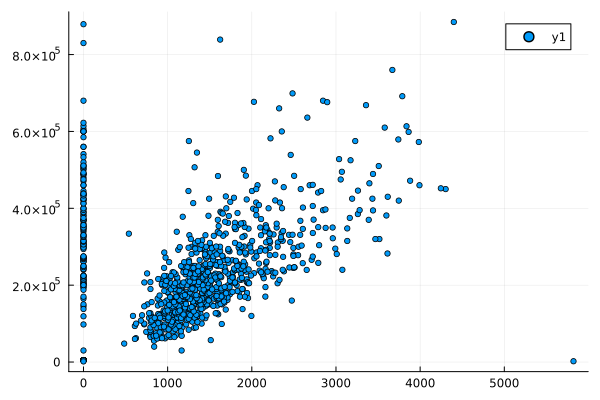

In [4]:
using CSV
using DataFrames
using Plots
# Загрузка данных из CSV
houses = CSV.read("houses.csv", DataFrame)
# Построение графика
plot(size=(500, 500), leg=false)
x = houses[:, :sq__ft]  # Столбец площади
y = houses[:, :price]   # Столбец цены
scatter(x, y, markersize=3)

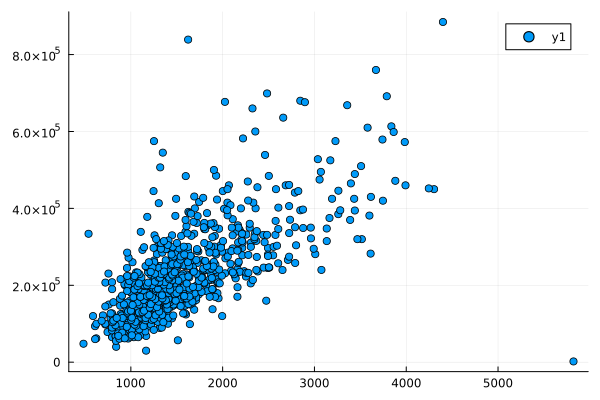

In [5]:
# Фильтрация данных по заданному условию:
filter_houses = houses[houses[!,:sq__ft].>0,:]
# Построение графика:
x = filter_houses[!,:sq__ft]
y = filter_houses[!,:price]
scatter(x,y)

Средние цены для каждого типа домов:
4×2 DataFrame
 Row │ type          mean_price     
     │ String15      Float64        
─────┼──────────────────────────────
   1 │ Residential        2.39186e5
   2 │ Condo              1.50082e5
   3 │ Multi-Family       2.24535e5
   4 │ Unkown        275000.0


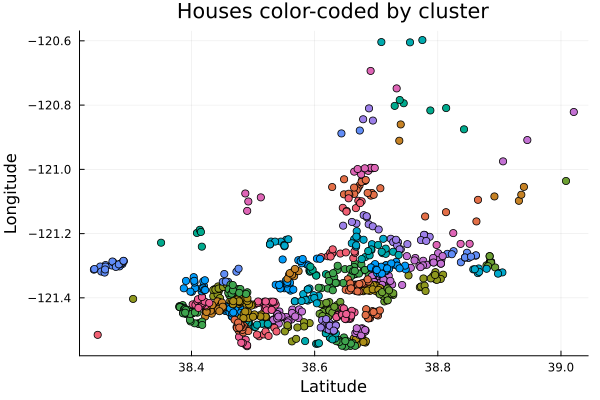

In [14]:
# Загрузка данных из CSV
filter_houses = CSV.read("houses.csv", DataFrame)
# Проверка на пропущенные значения в данных
if any(ismissing, filter_houses[:, :latitude]) || any(ismissing, filter_houses[:, :longitude])
    error("Данные содержат пропущенные значения в столбцах :latitude или :longitude.")
end
# Определение средней цены для каждого типа домов
mean_prices = combine(groupby(filter_houses, :type), :price => mean => :mean_price)
println("Средние цены для каждого типа домов:")
println(mean_prices)
# Добавление данных :latitude и :longitude
X = filter_houses[:, [:latitude, :longitude]]
# Преобразование DataFrame в матрицу
X = Matrix{Float64}(X)'
k = length(unique(filter_houses[:, :zip]))
# Определение кластеров k-среднего
C = kmeans(X, k)
# Формирование DataFrame с результатами кластеризации
df = DataFrame(
    cluster = C.assignments,
    city = filter_houses[:, :city],
    latitude = filter_houses[:, :latitude],
    longitude = filter_houses[:, :longitude],
    zip = filter_houses[:, :zip]
)
# Построение графика кластеров
clusters_figure = plot(legend=false)
for i in 1:k
    clustered_houses = df[df[:, :cluster] .== i, :]
    xvals = clustered_houses[:, :latitude]
    yvals = clustered_houses[:, :longitude]
    scatter!(clusters_figure, xvals, yvals, markersize=4)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by cluster")
display(clusters_figure)

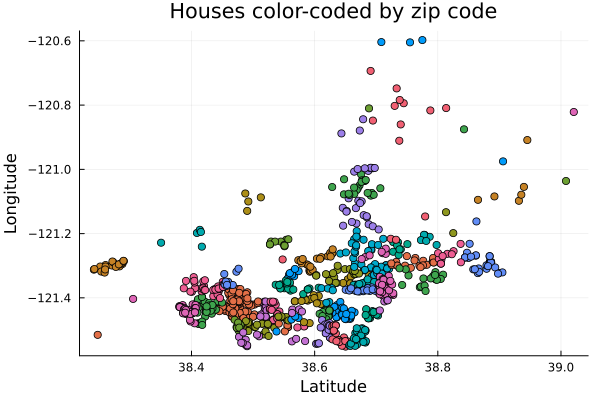

In [15]:
unique_zips = unique(filter_houses[!,:zip])
zips_figure = plot(legend = false)
for uzip in unique_zips
    subs = filter_houses[filter_houses[!,:zip].==uzip,:]
    x = subs[!,:latitude]
    y = subs[!,:longitude]
    scatter!(zips_figure,x,y)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by zip code")
display(zips_figure)

#### 2.2. Кластеризация данных. Метод k ближайших соседей

   Resolving package versions...
    Updating `C:\Users\Ivan\.julia\environments\v1.10\Project.toml`
  [b8a86587] + NearestNeighbors v0.4.21
  No Changes to `C:\Users\Ivan\.julia\environments\v1.10\Manifest.toml`


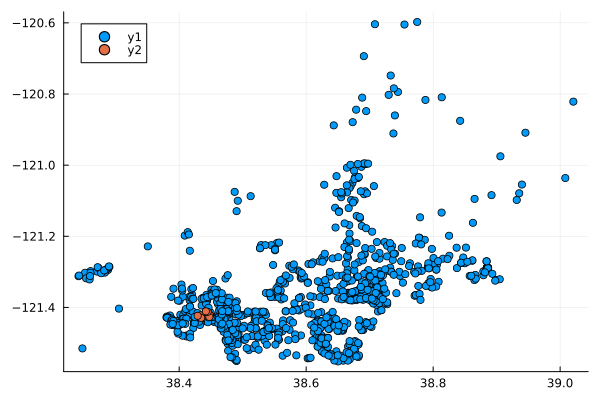

In [16]:
# Подключение пакета NearestNeighbors:
import Pkg
Pkg.add("NearestNeighbors")
using NearestNeighbors
knearest = 10
id = 70
point = X[:,id]
# Поиск ближайших соседей:
kdtree = KDTree(X)
idxs, dists = knn(kdtree, point, knearest, true)
# Все объекты недвижимости:
x = filter_houses[!,:latitude];
y = filter_houses[!,:longitude];
scatter(x,y)
# Соседи:
x = filter_houses[idxs,:latitude];
y = filter_houses[idxs,:longitude];
scatter!(x,y)

In [17]:
# Фильтрация по районам соседних домов:
cities = filter_houses[idxs,:city]

10-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "SACRAMENTO"
 "ELK GROVE"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"

#### 2.3. Обработка данных. Метод главных компонент

In [ ]:
# Фрейм с указанием площади и цены недвижимости:
F = filter_houses[[:sq__ft,:price]]
# Конвертация данных в массив:
F = convert(Array{Float64,2},F)'
# Подключение пакета MultivariateStats:
import Pkg
Pkg.add("MultivariateStats")
using MultivariateStats
# Приведение типов данных к распределению для PCA:
M = fit(PCA, F)
# Выделение значений главных компонент в отдельную переменную:
Xr = reconstruct(M, y)
# Построение графика с выделением главных компонент:
scatter(F[1,:],F[2,:])
scatter!(Xr[1,:],Xr[2,:])

#### 2.4. Обработка данных. Линейная регрессия

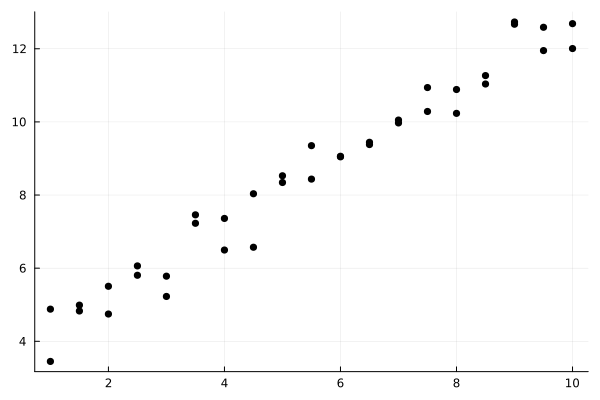

In [34]:
xvals = repeat(1:0.5:10,inner=2)
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1
scatter(xvals,yvals,color=:black,leg=false)

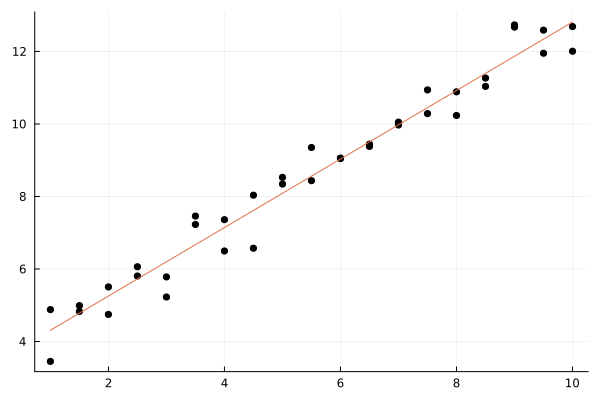

In [36]:
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
end
a,b = find_best_fit(xvals,yvals)
ynew = a * xvals .+ b
plot!(xvals,ynew)

In [ ]:
xvals = 1:100000;
xvals = repeat(xvals,inner=3);
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1;
@show size(xvals)
@show size(yvals)
@time a,b = find_best_fit(xvals,yvals)
import Pkg
Pkg.add("PyCall")
Pkg.add("Conda")
using PyCall
using Conda
py"""
import numpy
def find_best_fit_python(xvals,yvals):
    meanx = numpy.mean(xvals)
    meany = numpy.mean(yvals)
    stdx = numpy.std(xvals)
    stdy = numpy.std(yvals)
    r = numpy.corrcoef(xvals,yvals)[0][1]
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
"""
xpy = PyObject(xvals)
ypy = PyObject(yvals)
@time a,b = find_best_fit_python(xpy,ypy)
import Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools
@btime a,b = find_best_fit_python(xvals,yvals)
@btime a,b = find_best_fit(xvals,yvals)

### Самостоятельное выполнение

#### 1.1) Кластеризация

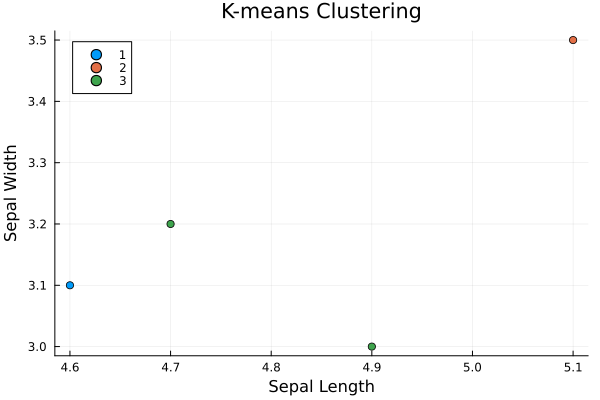

In [39]:
# Загрузка данных
iris = dataset("datasets", "iris")
# Преобразуем DataFrame в матрицу
X = Matrix{Float64}(iris[:, 1:4])  # Используем только числовые признаки
# Применяем кластеризацию методом k-средних
k = 3  # Количество кластеров
result = kmeans(X, k)
# Визуализация кластеров
scatter(X[:, 1], X[:, 2], group = result.assignments, xlabel = "Sepal Length", ylabel = "Sepal Width", title = "K-means Clustering")

#### 1.2) Регрессия (метод наименьших квадратов в случае линейной регрессии)

##### Часть 1.

In [ ]:
# Генерация данных
X = randn(1000, 3)
a0 = rand(3)
y = X * a0 + 0.1 * randn(1000)
# Добавляем столбец единиц в X для учета свободного члена
X2 = hcat(ones(1000), X)
# Применяем ридж-регрессию с небольшим значением регуляризации
ridge_result = ridge(X2, y, 1e-4)
println("Ридж-регрессия, коэффициенты:")
println(ridge_result)
# Сравнение с использованием GLM.jl
# Преобразуем X2 в DataFrame, чтобы использовать его с GLM
df = DataFrame(X2 = hcat(ones(1000), X)..., y = y)  # Распаковываем X2 в отдельные столбцы
model = lm(@formula(y ~ X2), df)
println("Результаты с использованием GLM.jl:")
println(coef(model))

##### Часть 2.

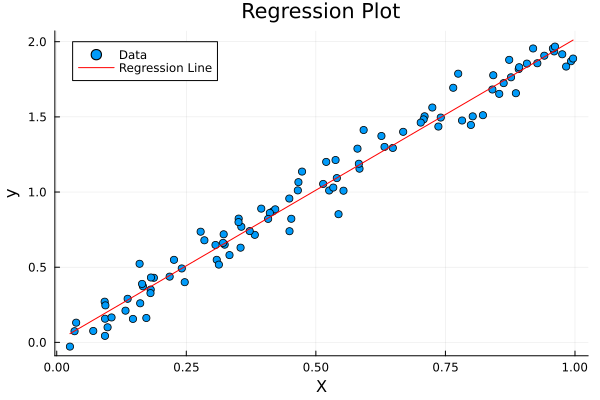

In [49]:
# Генерация данных
X = rand(100)
y = 2 * X + 0.1 * randn(100)
# Построение графика данных
scatter(X, y, label="Data", xlabel="X", ylabel="y", title="Regression Plot")
# Линейная регрессия
X2 = hcat(ones(100), X)  # Добавляем столбец единиц
beta = (X2' * X2) \ (X2' * y)
# Добавление линии регрессии
plot!(X, x -> beta[1] + beta[2] * x, label="Regression Line", color=:red)

#### 1.3) Модель ценообразования биномиальных опционов

##### a.

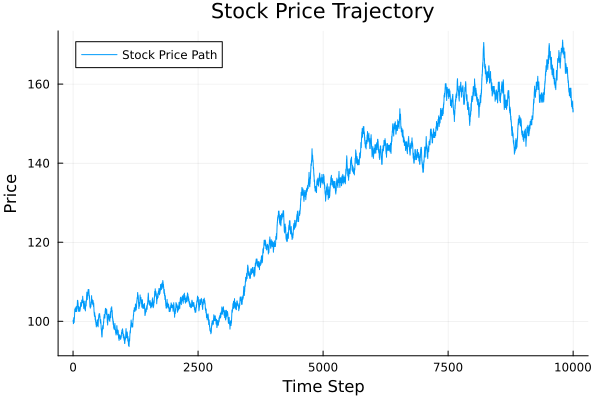

In [50]:
# Параметры модели
S = 100      # Начальная цена акции
T = 1        # Длительность в годах
n = 10000    # Количество периодов
sigma = 0.3  # Волатильность
r = 0.08     # Годовая процентная ставка
h = T / n    # Длина одного периода

# Расчет u и d
u = exp(r * h + sigma * sqrt(h))
d = exp(r * h - sigma * sqrt(h))

# Цена акции на каждом шаге
function create_path(S, r, sigma, T, n)
    path = zeros(Float64, n+1)
    path[1] = S 
    for i in 2:n+1
        if rand() > 0.5  # Пример случайного выбора направления
            path[i] = path[i-1] * u
        else
            path[i] = path[i-1] * d
        end
    end
    return path
end
# Генерация и построение траектории
path = create_path(S, r, sigma, T, n)
plot(path, label="Stock Price Path", xlabel="Time Step", ylabel="Price", title="Stock Price Trajectory")

##### b. 

In [54]:
# Генерация 10 траекторий
paths = [create_path(S, r, sigma, T, n) for _ in 1:10]
# Построение всех траекторий на одном графике
for path in paths
    plot!(path, label="Trajectory", xlabel="Time Step", ylabel="Price", title="Multiple Stock Price Trajectories")
end

##### c.

In [ ]:
using Threads
# Функция для параллельной генерации траекторий
function parallel_paths(n_paths)
    paths = Vector{Array{Float64, 1}}(undef, n_paths)
    Threads.@threads for i in 1:n_paths
        paths[i] = create_path(S, r, sigma, T, n)
    end
    return paths
end
# Генерация траекторий с использованием многозадачности
paths_parallel = parallel_paths(10)
# Построение всех параллельных траекторий
for path in paths_parallel
    plot!(path, label="Trajectory", xlabel="Time Step", ylabel="Price", title="Parallel Stock Price Trajectories")
end